#1.課題把握とゴールの設定

さまざまな物理的測定値からアワビの年齢を予測する。

---

#2.必要なライブラリのインポート

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

#3 データセットの準備

In [200]:
df = pd.read_csv('train.csv')
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


#カラム名、アワビの生態
<br>
##id:id<br>
<br>
##Sex:性別<br>
アワビの肝が肥大化する夏・秋に限り性別が分かる。肝（生殖腺）から、白色がオス、緑色がメスとなる。<br>
M:male オス　F:Female メス　I:Infant 稚貝<br>
<br>
##Length:長さ<br>
<br>
##Diameter:直径<br>
<br>
##Height:厚み？<br>
<br>
##Whole weight:全体重量<br>
<br>
##whole weight1:<br>
<br>
##whole weight2:<br>
<br>
##Shell weight:殻重量<br>
<br>
##Rings:年輪<br>
アワビの年齢形質（年齢が読み取れる部位）は殻の表面にできる輪紋で、1年に1本産卵期にできると言われている。<br>
アワビの寿命は15~20年と言われている。長い個体だと30年生きることもある。

In [201]:
df.shape

(90615, 10)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


欠損値はなし。<br>
Sexの型をobject型から適切な方に変更したい。<br>
ラベルエンコーディング：各カテゴリーに整数を割り当て<br>
ワンホットエンコーディング：各カテゴリーを新しい列として持ち、TrueかFalseに分けるバイナリ特徴量を作成する。

In [203]:
#ラベルエンコーディングで整数を割り当てる。
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,1,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,0,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,2,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  int64  
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 6.9 MB


In [205]:
#説明変数X（Rings以外)と目的変数(Rings)に分ける。
X = df.drop(columns=['Rings']).to_numpy()
y = df['Rings'].to_numpy()

In [206]:
#train_test_split関数のインポート
from sklearn.model_selection import train_test_split

In [207]:
#Xとyをそれぞれ学習データとテストデータに7:3で分割する。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [208]:
#7:3に分割されたか確認
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(63430, 9) (27185, 9) (63430,) (27185,)


---

4.予測モデルの学習<br>
重回帰で分析を行う場合、scikit-learnのLinearRegressionクラスを活用

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
model = LinearRegression()

In [211]:
model.fit(X_train, y_train)

LinearRegression()

---

5.予測モデルの評価

In [212]:
#学習データを用いて決定係数を出力
model.score(X_train, y_train)

0.6017419961112478

In [213]:
#テストデータを用いて決定係数を出力
model.score(X_test, y_test)

0.6070985383496932

---

6.予測

In [233]:
df_test = pd.read_csv('test.csv')
df_test['Sex'] = df_test['Sex'].map({'M': 0, 'F': 1, 'I': 2})
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,0,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,0,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,0,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,2,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [234]:
model.predict(df_test)

C:\Users\whand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 8.65039809, 10.1047155 , 10.34658533, ..., 10.98982526,
       13.44388667,  8.27789769])

In [226]:
df_test['Rings'] = model.predict(df_test)
df_test.head()

C:\Users\whand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,90615,0,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,8.650398
1,90616,0,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,10.104715
2,90617,0,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,10.346585
3,90618,0,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,11.072638
4,90619,2,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,7.849893


In [227]:
print(model.coef_)
print(model.intercept_)

[-2.39687282e-07 -2.93748235e-01 -2.56828203e+00  9.23023066e+00
  2.05643749e+01  3.75927103e+00 -1.59603481e+01 -6.21396291e+00
  2.08126379e+01]
3.661985060634999


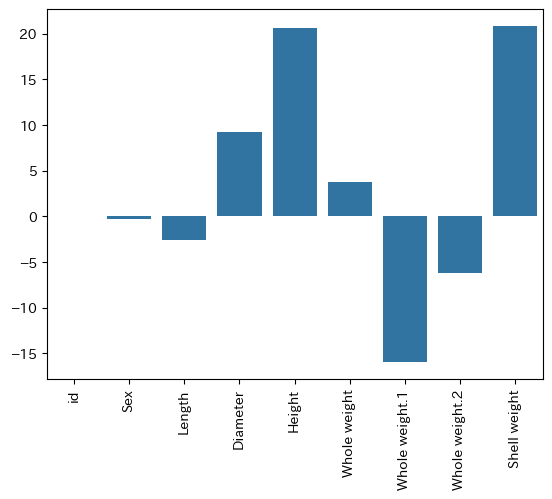

In [228]:
sns.barplot(x = ['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight'], y=model.coef_)
plt.xticks(rotation=90)
plt.show()

#kaggle提出用データの作成

In [220]:
submission = df_test[['id', 'Rings']]
submission.to_csv('submission.csv', index=False)

In [237]:
submission.describe()

,id,Rings
count,60411.000000,60411.000000
mean,120820.000000,9.682564
std,17439.297893,2.455221
min,90615.000000,-1.440407
25%,105717.500000,7.930430
50%,120820.000000,9.616676
75%,135922.500000,11.122869
max,151025.000000,28.671665


マイナスが含まれるため平均二乗対数誤差が使用できませんとエラーがでる。<br>
そもそも平均二乗対数誤差て。重回帰じゃないということか？